In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

In [49]:
x = np.linspace(-5,5,10)
y = np.linspace(-5,5,10)

z = np.zeros((3,len(x)))

z[0] = 2*x - y - 2
z[1] = x + 2*y - 1
z[2] = x + y - 4

In [50]:
A = np.array([[2,-1],[1,2],[1,1]])
b = np.array([2,1,4])
At = A.T
M = np.dot(At,A)
bt = np.dot(At,b)
xsol = np.linalg.solve(M,bt)
xsol

array([1.42857143, 0.42857143])

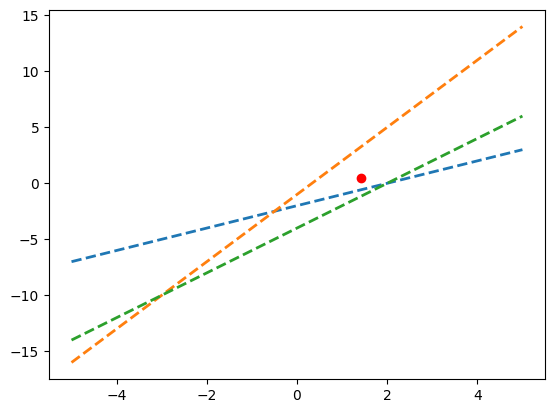

In [51]:
for l in range(z.shape[0]):
    plt.plot(x,z[l],ls='--',lw=2)
plt.scatter(xsol[0],xsol[1],color='r')

De esto podemos comprender que este es un sistema no lineal y que la respuesta es sólo un acercamiento, ya que un hay un punto que las tres rectas compartan.

In [58]:
line1 = lambda x, y: 2*x - y - 2
line2 = lambda x, y: x + 2*y - 1
line3 = lambda x, y: x + y - 4
def distance(x, y, line):
    return abs(line(x, y)) / np.sqrt(line(x, y)**2 + 1)

min_distance = float('inf')
min_x = min_y = 0
d = []
step = 0.01
for x in np.arange(-5, 5, step):
    for y in np.arange(-5, 5, step):
        dist1 = distance(x, y, line1)
        dist2 = distance(x, y, line2)
        dist3 = distance(x, y, line3)

        total_dist = dist1 + dist2 + dist3
        d.append(total_dist)
        if total_dist < min_distance:
            min_distance = total_dist
            min_x, min_y = x, y

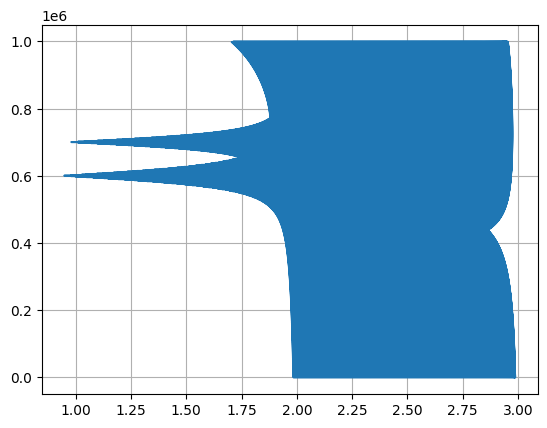

In [59]:
x_vals = np.linspace(-5, 5, 100)
plt.plot(d, np.linspace(0, len(d), len(d)))
plt.grid(True)
plt.show()

In [46]:
min_x, min_y

(0.9999999999998721, -1.0658141036401503e-13)